In [2]:
import matplotlib.pyplot as plt

In [3]:
def f(t, y):
    return -2*y

In [4]:
def euler(t0, y0, t_target, deltaT):
    t = t0
    y = y0
    points = [(t, y)]
    while t < t_target:
        y = y + deltaT*f(t, y)
        t = t + deltaT
        points.append((t, y))

    return points


In [5]:
def heun(t0,y0,t_target,deltaT):
    t = t0
    y = y0
    points = [(t, y)]

    def phi(t,y,deltaT):
        return 0.5*(f(t,y)+f(t+deltaT,y+deltaT*f(t,y)))

    while t < t_target:
        y = y + deltaT*phi(t,y,deltaT)
        t = t + deltaT
        points.append((t, y))

    return points

In [6]:
def midpoint(t0,y0,y_prev,t_target,deltaT):
    t = t0
    y = y0
    points = [(t, y)]

    while t < t_target:
        y_new = y_prev + 2*deltaT*f(t,y)
        t = t + deltaT
        y_prev = y
        y = y_new
        points.append((t, y))

    return points

Text(0.5, 1.0, 'Euler')

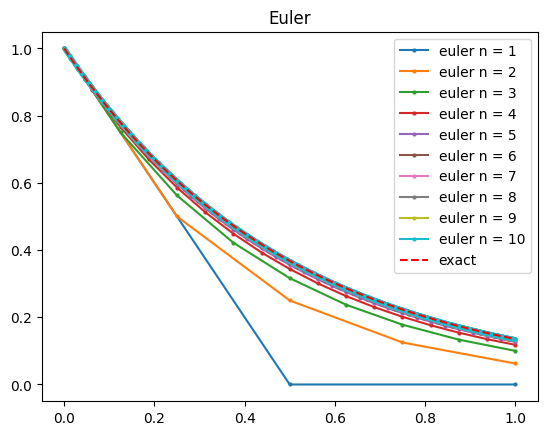

In [7]:
import numpy as np

fig, ax = plt.subplots()

for n in range(1, 11):
    delta_t=2**(-n)
    points_euler = euler(0, 1, 1, delta_t)
    ax.plot([p[0] for p in points_euler], [p[1] for p in points_euler], label=f"euler n = {n}", marker="o",markersize=2)


#exact solution
t = np.linspace(0, 1, 100)
y = np.exp(-2*t)
ax.plot(t, y, label="exact", color="red", linestyle="dashed")

plt.legend()
plt.title("Euler")

Text(0.5, 1.0, "Heun's method")

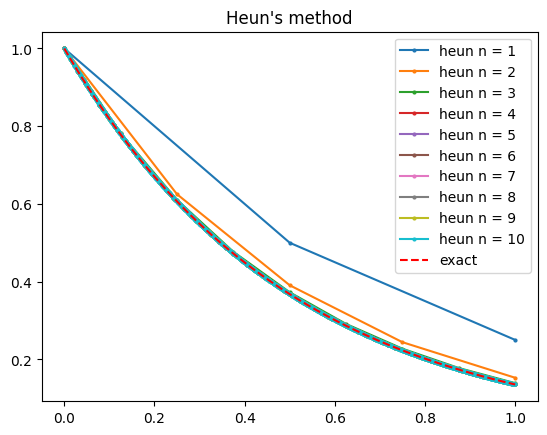

In [8]:
fig, ax = plt.subplots()

for n in range(1, 11):
    delta_t=2**(-n)
    points = heun(0, 1, 1, delta_t)
    ax.plot([p[0] for p in points], [p[1] for p in points], label=f"heun n = {n}", marker="o",markersize=2)

#exact solution
t = np.linspace(0, 1, 100)
y = np.exp(-2*t)
ax.plot(t, y, label="exact", color="red", linestyle="dashed")

plt.legend()
plt.title("Heun's method")

Text(0.5, 1.0, 'Midpoint method')

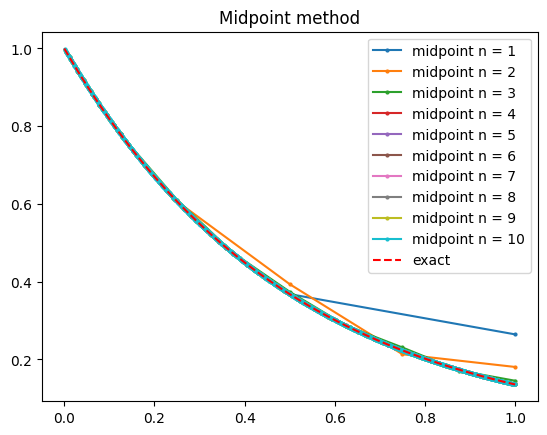

In [9]:
fig, ax = plt.subplots()

for n in range(1, 11):
    delta_t=2**(-n)
    points = midpoint(delta_t, np.exp(-2*delta_t), 1, 1, delta_t)
    ax.plot([p[0] for p in points], [p[1] for p in points], label=f"midpoint n = {n}", marker="o",markersize=2)

#exact solution
t = np.linspace(0, 1, 100)
y = np.exp(-2*t)
ax.plot(t, y, label="exact", color="red", linestyle="dashed")

plt.legend()
plt.title("Midpoint method")

In [10]:
euler_1=[]
heun_1=[]
exact_1= np.exp(-2)

for n in range(1, 11):
    delta_t=2**(-n)
    points_euler = euler(0, 1, 1, delta_t)
    euler_1.append(points_euler[-1][1])
    points_heun = heun(0, 1, 1, delta_t)
    heun_1.append(points_heun[-1][1])

Text(0.5, 1.0, 'absolute Errors')

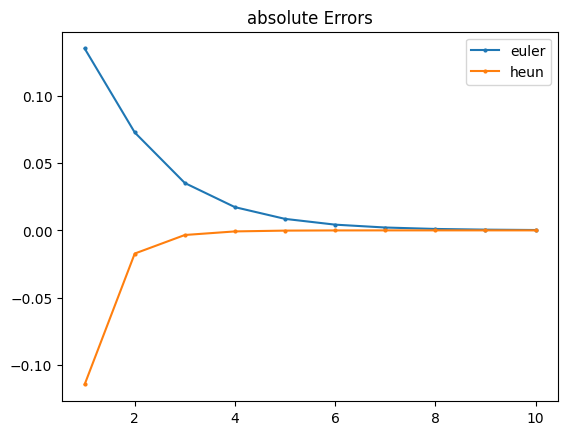

In [11]:
fig, ax = plt.subplots()

error_euler = [(exact_1 - y) for y in euler_1]
error_heun = [(exact_1 - y) for y in heun_1]

ax.plot(range(1, 11), error_euler, label="euler", marker="o",markersize=2)
ax.plot(range(1, 11), error_heun, label="heun", marker="o",markersize=2)

plt.legend()
plt.title("absolute Errors")


Text(0.5, 1.0, 'convergence order')

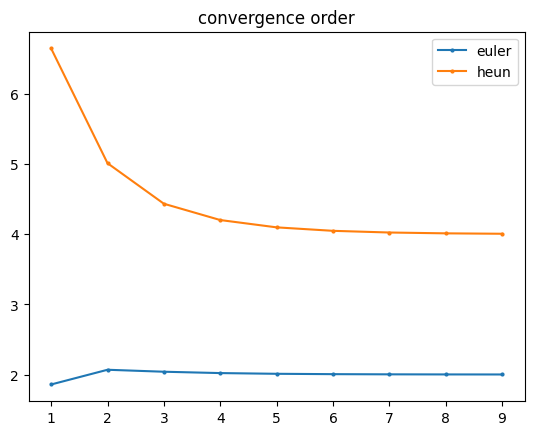

In [12]:
#convergence order
fig, ax = plt.subplots()

convergence_euler=[error_euler[i]/error_euler[i+1] for i in range(len(error_euler)-1)]
convergence_heun=[error_heun[i]/error_heun[i+1] for i in range(len(error_heun)-1)]

ax.plot(range(1, 10), convergence_euler, label="euler", marker="o",markersize=2)
ax.plot(range(1, 10), convergence_heun, label="heun", marker="o",markersize=2)

plt.legend()
plt.title("convergence order")

In [23]:
dt=0.2

heun(0, 1, 1, dt)

[(0, 1),
 (0.2, 0.6799999999999999),
 (0.4, 0.4623999999999999),
 (0.6000000000000001, 0.31443199999999993),
 (0.8, 0.21381375999999996),
 (1.0, 0.14539335679999998)]

In [28]:
[(n*dt,(1-2*dt*(1-dt))**n) for n in range(0, 6)]

[(0.0, 1.0),
 (0.2, 0.6799999999999999),
 (0.4, 0.4623999999999999),
 (0.6000000000000001, 0.31443199999999993),
 (0.8, 0.2138137599999999),
 (1.0, 0.14539335679999993)]